<a href="https://colab.research.google.com/github/yjy772001-ai/AI-Orientalism-Color-Analysis/blob/main/colorthief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Critical AI as Iconology - Color Analysis
              

Description: This script utilizes the ColorThief library to extract dominant color palettes from 95 AI-generated Orientalist images, revealing normative "yellow-brown" dominant colours in the model's output.

In [1]:
import numpy

In [2]:
import PIL

In [3]:
!pip install colorthief

In [4]:
import colorthief

In [5]:
import math

In [6]:
from PIL import Image

In [7]:
def create_grid(images, cols):
    rows = math.ceil(len(images) / cols)
    width = images[0].width
    height = images[0].height

    grid = Image.new('RGB', (width * cols, height * rows))

    for i, img in enumerate(images):
        grid.paste(img, ((i % cols) * width, (i // cols) * height))

    return grid

# Usage
images = [Image.open(f"../image{i}.jpeg") for i in range(1, 31)]
grid = create_grid(images, 5)
grid.save("dynamic_grid.jpeg")

In [8]:
from colorthief import ColorThief

In [9]:
import glob

In [10]:
dominant_colours = []

In [11]:
list = glob.glob(r'../*.jpeg')
for name in list:
  print(name)
  color1 = ColorThief(name)
  dominant = color1.get_color(quality=1) # dominant colour palette for this image
  dominant_colours.append(dominant)

../image14.jpeg
../image20.jpeg
../image3.jpeg
../image29.jpeg
../image16.jpeg
../image5.jpeg
../image19.jpeg
../image13.jpeg
../image12.jpeg
../image11.jpeg
../image18.jpeg
../image4.jpeg
../image24.jpeg
../image7.jpeg
../image15.jpeg
../image28.jpeg
../image30.jpeg
../image1.jpeg
../image17.jpeg
../image26.jpeg
../image23.jpeg
../image6.jpeg
../image2.jpeg
../image10.jpeg
../image21.jpeg
../image25.jpeg
../image9.jpeg
../image8.jpeg
../image22.jpeg
../image27.jpeg


In [12]:
dominant_colours

[(118, 84, 14),
 (106, 69, 12),
 (68, 46, 8),
 (93, 52, 6),
 (101, 68, 9),
 (65, 50, 9),
 (112, 76, 14),
 (111, 76, 13),
 (83, 55, 9),
 (100, 65, 16),
 (75, 49, 10),
 (72, 52, 9),
 (103, 68, 10),
 (88, 60, 9),
 (107, 75, 11),
 (106, 67, 12),
 (97, 62, 5),
 (66, 40, 10),
 (82, 52, 7),
 (73, 44, 7),
 (102, 65, 11),
 (74, 49, 7),
 (73, 50, 12),
 (85, 54, 7),
 (72, 39, 7),
 (117, 81, 14),
 (80, 44, 5),
 (75, 51, 11),
 (96, 56, 7),
 (73, 41, 7)]

In [13]:
print(len(dominant_colours))

30


In [14]:
visualisation = """<html><table>"""

Loop through adding rows of 5 cells

In [15]:
cols = 5
i = 0
length = len(dominant_colours)
for colour in dominant_colours:
  visualisation+=f"<tr><td style=\"background-color:rgb{dominant_colours[i]}; width:10%\">&nbsp;&nbsp;</td><td style=\"background-color:rgb{dominant_colours[i+1]}; width:10%\">&nbsp;&nbsp;</td><td style=\"background-color:rgb{dominant_colours[i+2]}; width:10%\">&nbsp;&nbsp;</td><td style=\"background-color:rgb{dominant_colours[i+3]}; width:10%\">&nbsp;&nbsp;</td><td style=\"background-color:rgb{dominant_colours[i+4]}; width:10%\">&nbsp;&nbsp;</td></tr>"
  i+=cols
  length -= cols
  if length < cols: #stop if we don't have enough remaining images to fill a complete row
    break

In [16]:
visualisation += "</table></html>"

In [17]:
visualisation

'<html><table><tr><td style="background-color:rgb(118, 84, 14); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(106, 69, 12); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(68, 46, 8); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(93, 52, 6); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(101, 68, 9); width:10%">&nbsp;&nbsp;</td></tr><tr><td style="background-color:rgb(65, 50, 9); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(112, 76, 14); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(111, 76, 13); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(83, 55, 9); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(100, 65, 16); width:10%">&nbsp;&nbsp;</td></tr><tr><td style="background-color:rgb(75, 49, 10); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(72, 52, 9); width:10%">&nbsp;&nbsp;</td><td style="background-color:rgb(103, 68, 10); width:10%">&nbsp;&nbsp;</td><td style="bac

In [18]:
with open("visualisation.html", "w") as f:
  f.write(visualisation)

Create a check and improve the HTML: print the filenames in a square to make sure they're in the required order.

In [19]:
import glob, re

filenames = glob.glob('../image*.jpeg')

# arrange the files in the order of numbers in their names: image1, image2, ... image30
filenames = sorted(
    filenames,
    key=lambda p: int(re.search(r'(\d+)', p).group())
)

print(filenames)

['../image1.jpeg', '../image2.jpeg', '../image3.jpeg', '../image4.jpeg', '../image5.jpeg', '../image6.jpeg', '../image7.jpeg', '../image8.jpeg', '../image9.jpeg', '../image10.jpeg', '../image11.jpeg', '../image12.jpeg', '../image13.jpeg', '../image14.jpeg', '../image15.jpeg', '../image16.jpeg', '../image17.jpeg', '../image18.jpeg', '../image19.jpeg', '../image20.jpeg', '../image21.jpeg', '../image22.jpeg', '../image23.jpeg', '../image24.jpeg', '../image25.jpeg', '../image26.jpeg', '../image27.jpeg', '../image28.jpeg', '../image29.jpeg', '../image30.jpeg']


In [20]:
cols = 5
for i in range(0, len(filenames), cols):
    row_files = filenames[i:i+cols]
    print(', '.join(row_files))

../image1.jpeg, ../image2.jpeg, ../image3.jpeg, ../image4.jpeg, ../image5.jpeg
../image6.jpeg, ../image7.jpeg, ../image8.jpeg, ../image9.jpeg, ../image10.jpeg
../image11.jpeg, ../image12.jpeg, ../image13.jpeg, ../image14.jpeg, ../image15.jpeg
../image16.jpeg, ../image17.jpeg, ../image18.jpeg, ../image19.jpeg, ../image20.jpeg
../image21.jpeg, ../image22.jpeg, ../image23.jpeg, ../image24.jpeg, ../image25.jpeg
../image26.jpeg, ../image27.jpeg, ../image28.jpeg, ../image29.jpeg, ../image30.jpeg


In [21]:
for i, (name, colour) in enumerate(zip(filenames, dominant_colours), start=1):
    print(i, name, colour)
    if i >= 10:   # check the first 10 images to match the names and dominant colours
        break

1 ../image1.jpeg (118, 84, 14)
2 ../image2.jpeg (106, 69, 12)
3 ../image3.jpeg (68, 46, 8)
4 ../image4.jpeg (93, 52, 6)
5 ../image5.jpeg (101, 68, 9)
6 ../image6.jpeg (65, 50, 9)
7 ../image7.jpeg (112, 76, 14)
8 ../image8.jpeg (111, 76, 13)
9 ../image9.jpeg (83, 55, 9)
10 ../image10.jpeg (100, 65, 16)


In [26]:
cols = 5
visualisation = "<html><table border='1' cellspacing='0' cellpadding='4'>"

for idx, (name, colour) in enumerate(zip(filenames, dominant_colours)):

    if idx % cols == 0:
        visualisation += "<tr>"

    num = idx + 1

    visualisation += (
        f'<td style="background-color:rgb{colour}; '
        f'width:80px; height:80px; text-align:center; '
        f'font-size:10px; color:#000;">'
        f'{num}<br>{name}'
        f'</td>'
    )

    if (idx + 1) % cols == 0:
        visualisation += "</tr>"

if len(dominant_colours) % cols != 0:
    visualisation += "</tr>"

visualisation += "</table></html>"

with open("visualisation_debug.html", "w") as f:
    f.write(visualisation)

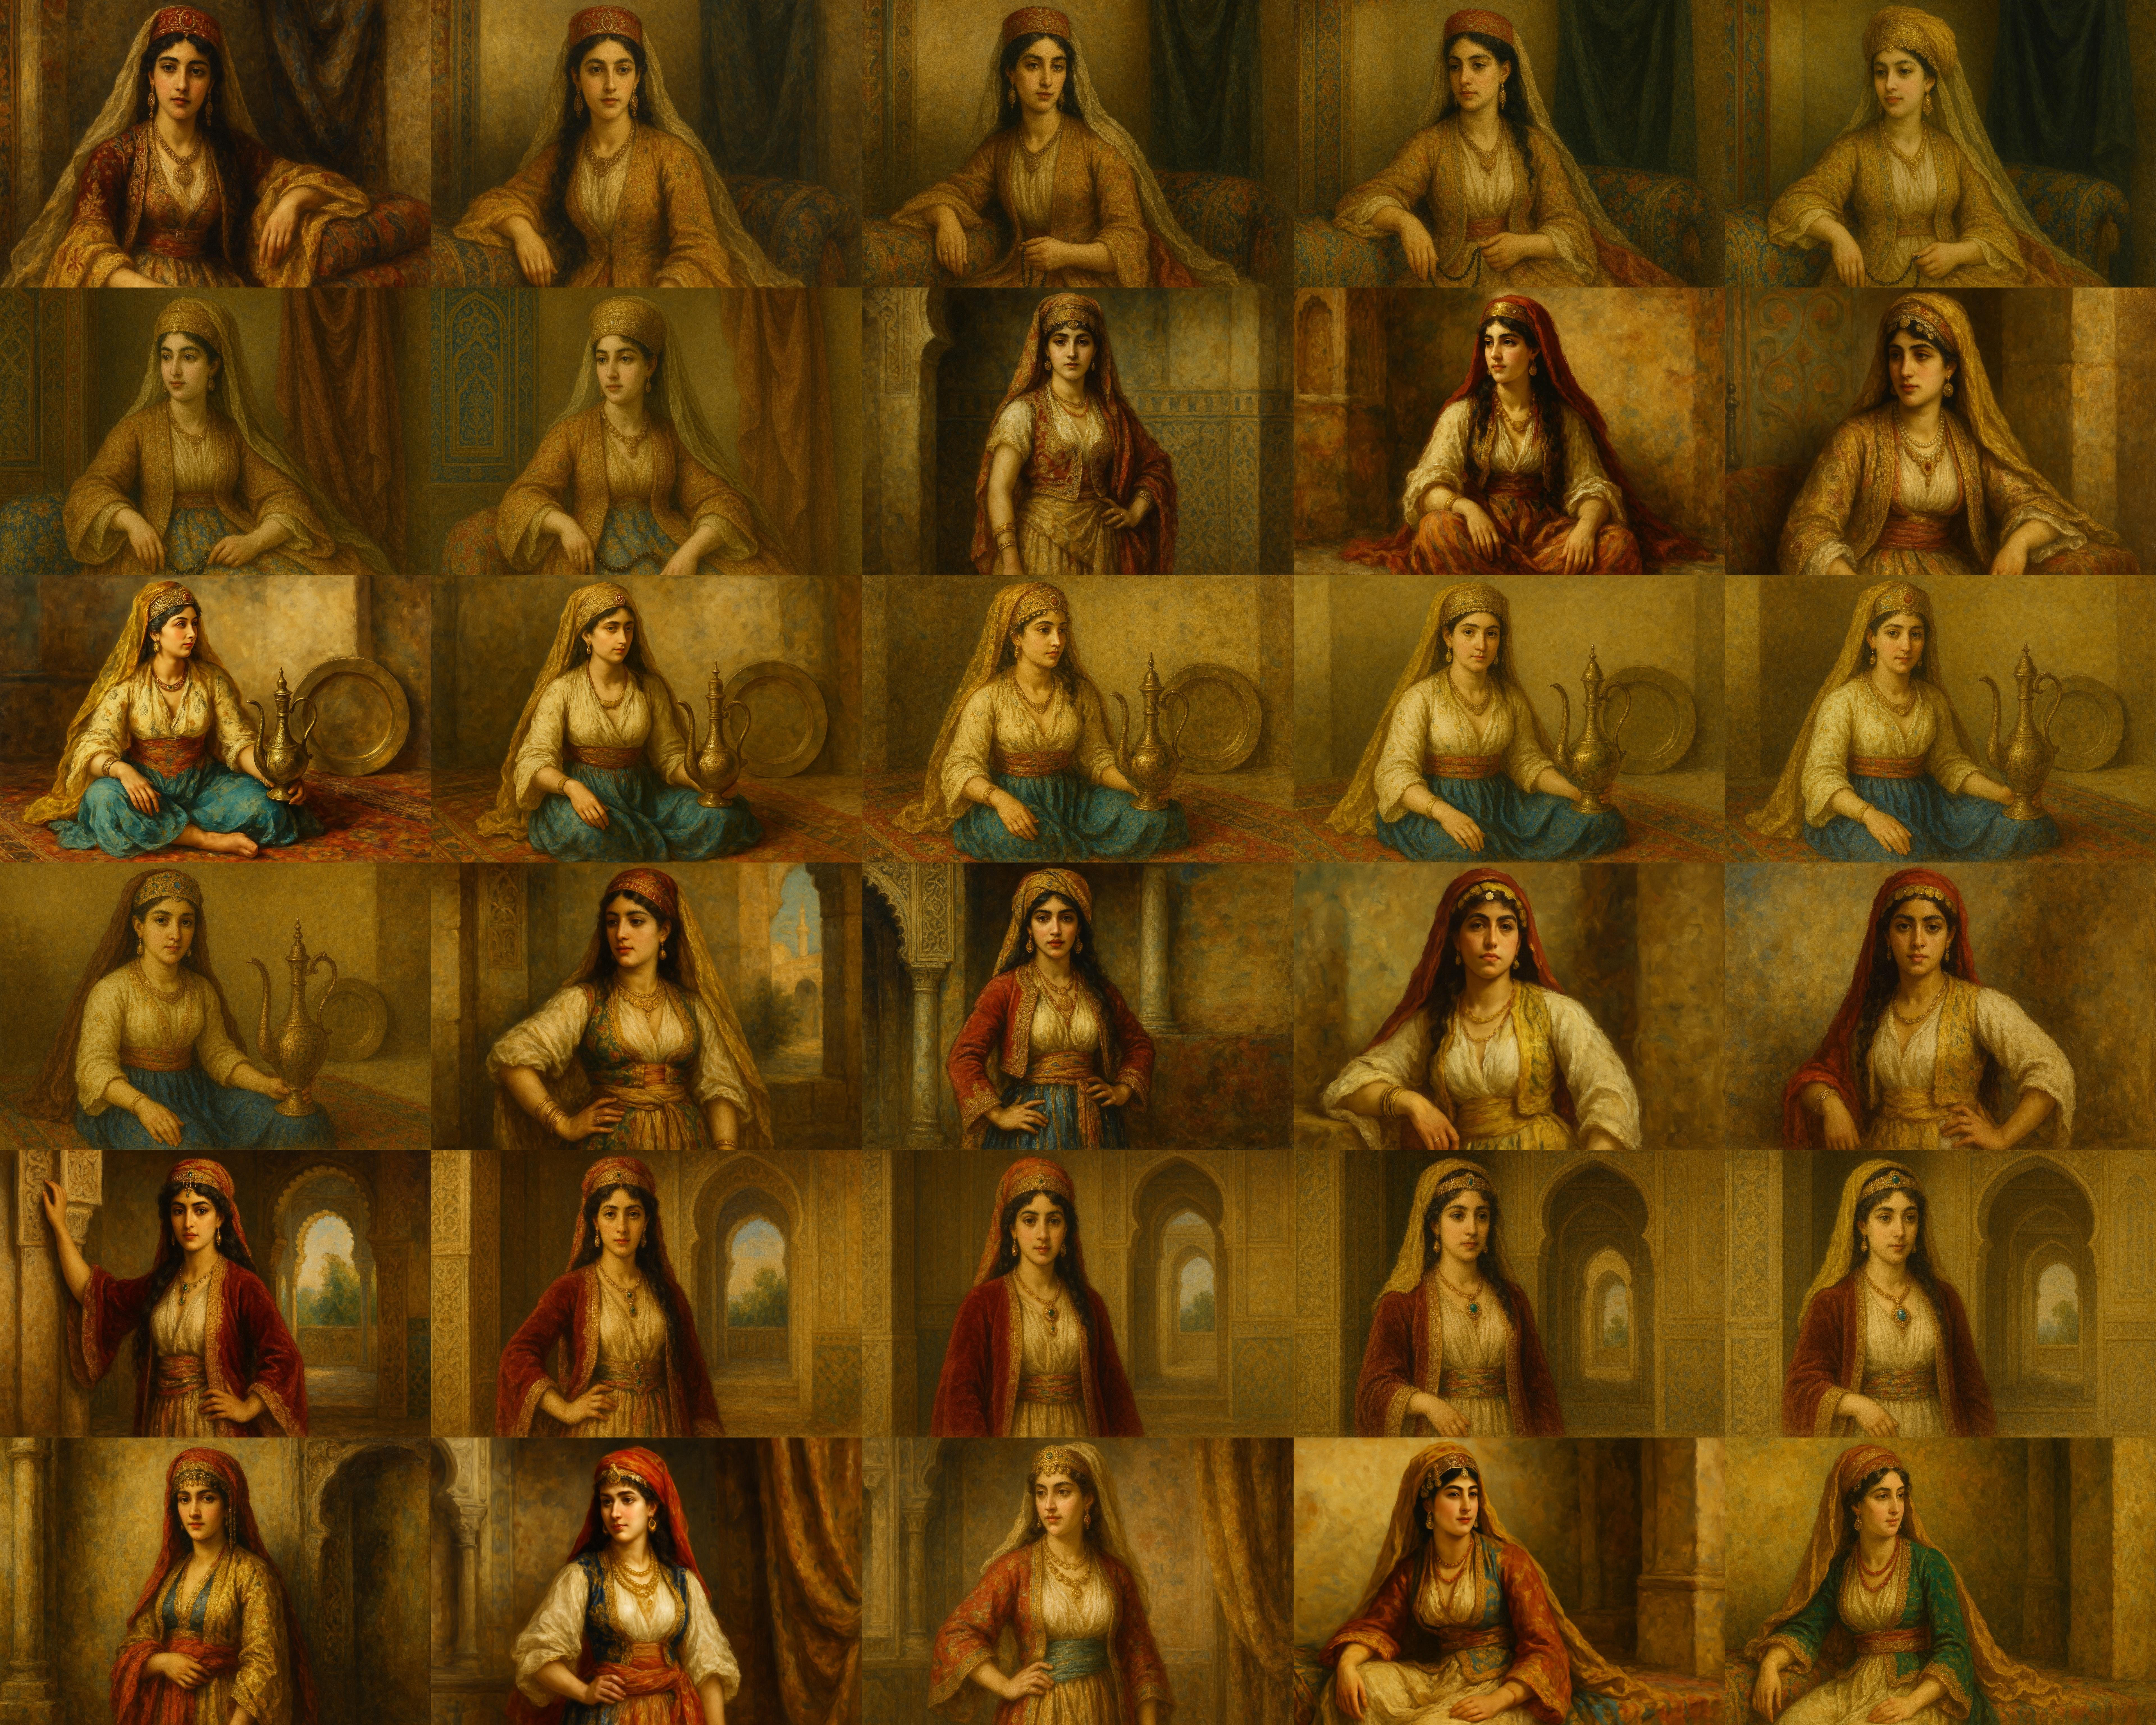

In [23]:
from IPython.display import Image, display
display(Image('dynamic_grid.jpeg'))

In [25]:
from IPython.display import HTML, display

display(HTML(visualisation))